In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Loading dataset in memory

In [2]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Attribute Information: (classes: edible=e, poisonous=p)¶
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

<AxesSubplot: >

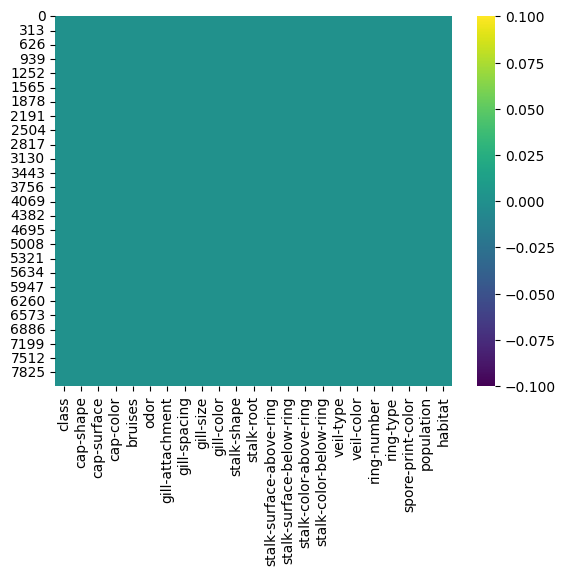

In [4]:
sns.heatmap(df.isnull(), cmap='viridis')

In [5]:
df_norm = pd.DataFrame(columns=df.columns)
le = LabelEncoder()
for c in df.columns:
    df_norm[c] = le.fit_transform(df[c])
df_norm

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


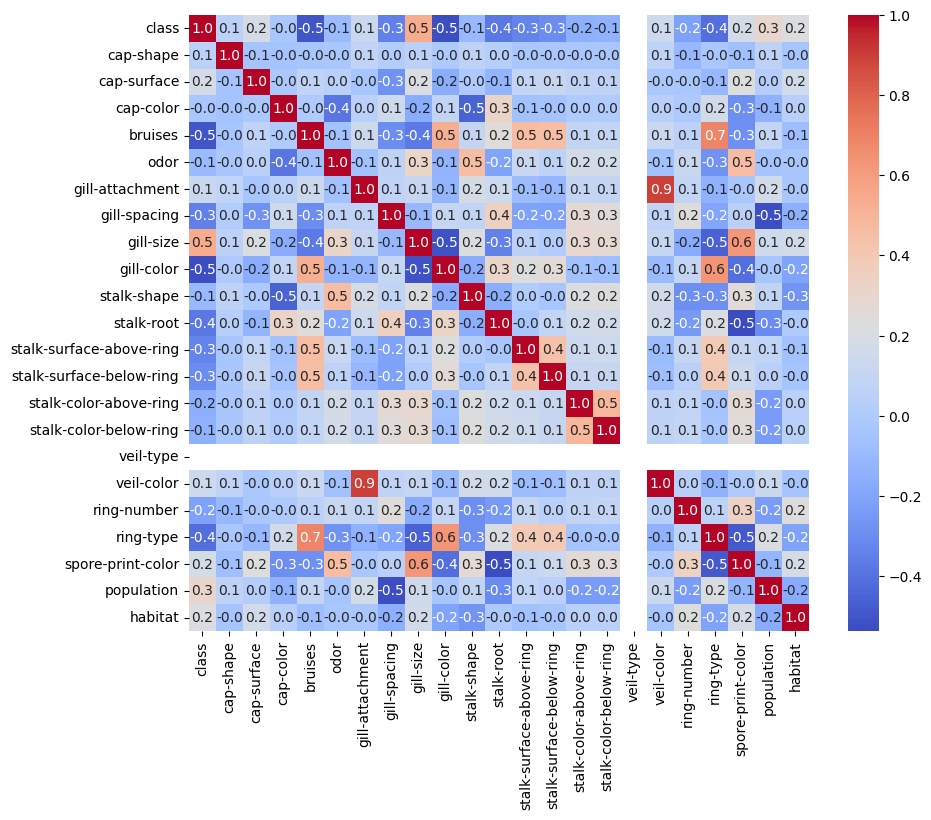

In [6]:
corr = df_norm.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f')
plt.show()

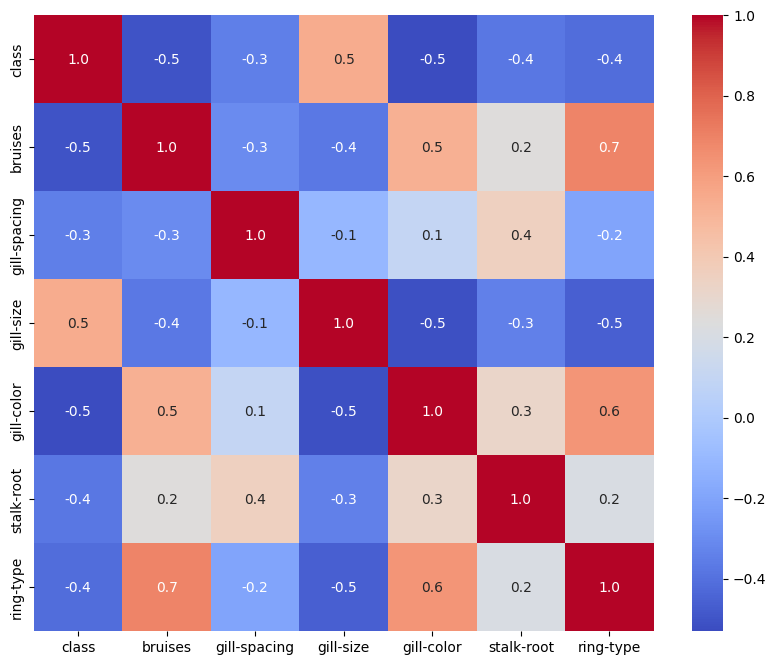

In [7]:
df = df.drop('veil-type', axis=1)
df_norm = df_norm.drop('veil-type', axis=1)

# For fun and (no) profit
for_drop = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape',
            'stalk-color-above-ring', 'stalk-color-below-ring', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
           'veil-color', 'ring-number', 'spore-print-color', 'population', 'habitat']
for c in for_drop:
    df = df.drop(c, axis=1)
    df_norm = df_norm.drop(c, axis=1)

corr = df_norm.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f')
plt.show()


## Prepare training and test data

In [8]:
scaler = StandardScaler()
x = df_norm.drop(['class'], axis = 1)
y = df_norm['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

## kNN

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_x_train, y_train)


KNeighborsClassifier()

In [10]:
pred = knn.predict(scaled_x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[838   0]
 [ 49 738]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       838
           1       1.00      0.94      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



#### Choosing k:

In [11]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train,y_train)
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.030153846153846153,
 0.03076923076923077,
 0.03076923076923077,
 0.03076923076923077,
 0.03076923076923077,
 0.03076923076923077,
 0.03076923076923077,
 0.03076923076923077,
 0.03076923076923077,
 0.03076923076923077,
 0.031384615384615386,
 0.031384615384615386,
 0.031384615384615386,
 0.031384615384615386,
 0.031384615384615386,
 0.031384615384615386,
 0.031384615384615386]

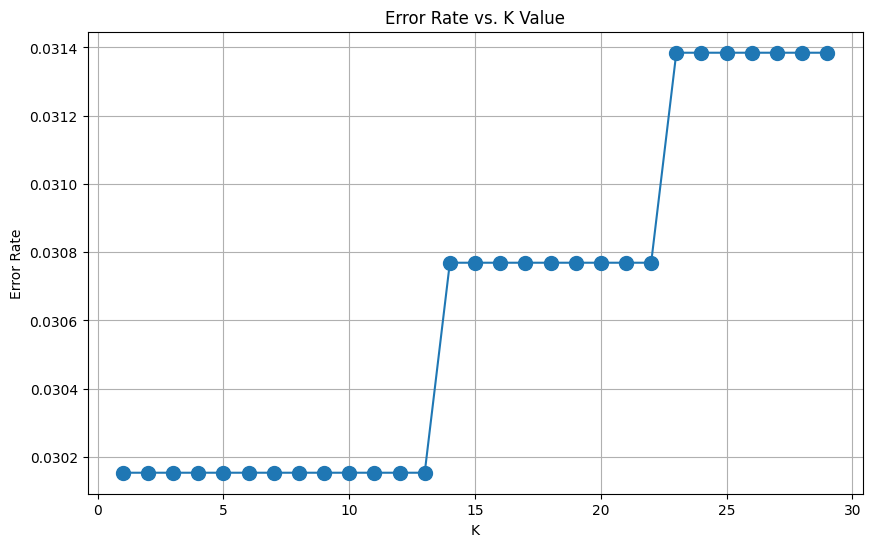

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

Optimal k value is 4-7, so 5 is fine

## Decision tree

In [13]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
pred = model.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[838   0]
 [ 49 738]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       838
           1       1.00      0.94      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



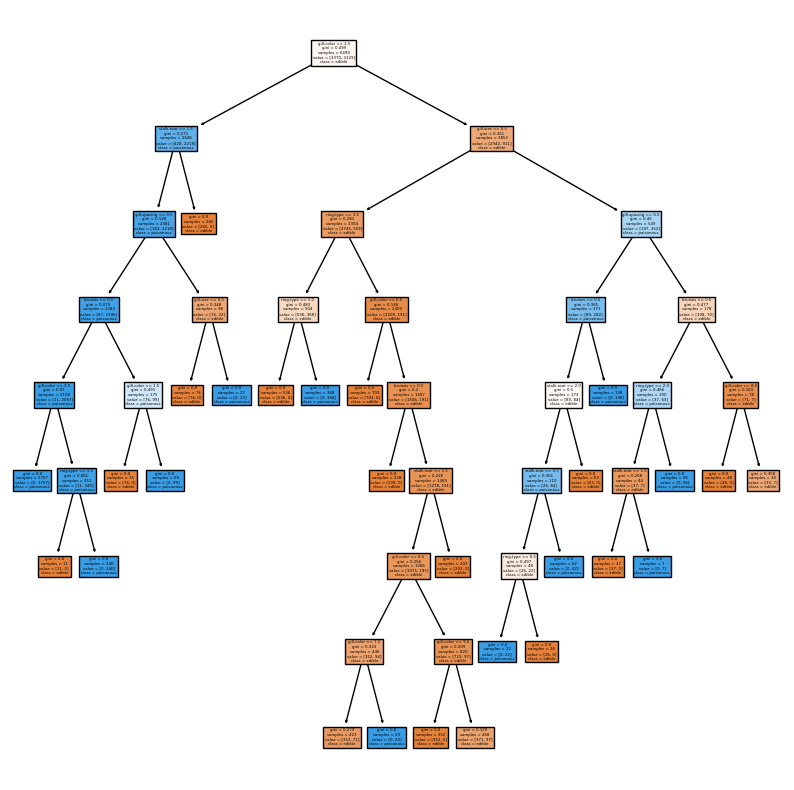

In [15]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names=[c for c in x_train.columns], class_names=['edible', 'poisonous'], filled = True)
plt.show()

In [16]:
print(export_text(model, feature_names=[c for c in x_train.columns]))

|--- gill-color <= 3.50
|   |--- stalk-root <= 1.50
|   |   |--- gill-spacing <= 0.50
|   |   |   |--- bruises <= 0.50
|   |   |   |   |--- gill-color <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gill-color >  2.50
|   |   |   |   |   |--- ring-type <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ring-type >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- bruises >  0.50
|   |   |   |   |--- gill-color <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- gill-color >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- gill-spacing >  0.50
|   |   |   |--- gill-size <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- gill-size >  0.50
|   |   |   |   |--- class: 1
|   |--- stalk-root >  1.50
|   |   |--- class: 0
|--- gill-color >  3.50
|   |--- gill-size <= 0.50
|   |   |--- ring-type <= 3.50
|   |   |   |--- ring-type <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- ring-type >  1.00
|   |   |   |   |--- class: 

## SVM

In [17]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_x_train,y_train)

SVC(gamma=1.0)

In [18]:
pred = model.predict(scaled_x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[838   0]
 [ 50 737]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       838
           1       1.00      0.94      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



#### Choosing best params:

In [19]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_x_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [20]:
grid_predictions = grid.predict(scaled_x_test)
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       838
           1       1.00      0.94      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

[[838   0]
 [ 49 738]]


## Random forest

In [21]:
model = RandomForestClassifier()
model.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = model.predict(scaled_x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[838   0]
 [ 50 737]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       838
           1       1.00      0.94      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



## AdaBoost

In [23]:
model = AdaBoostClassifier()
model.fit(scaled_x_train, y_train)

AdaBoostClassifier()

In [24]:
y_pred = model.predict(scaled_x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[838   0]
 [ 50 737]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       838
           1       1.00      0.94      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

